# Performing an RFM analysis and develop customer segments based on their RFM scores

The goal of this analysis is to find out which customers:
    -Spend the most
    -Frequent customers
    -Are more likely to leave
So that we can curate solutions for how to move forward.

In [87]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# read csv file
df=pd.read_csv('rfm_data.csv')
df.head()

CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris

### Cleaning data

In [4]:
# see the characteristicsof the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [7]:
# how many rows and columns does it have
df.shape

(1000, 6)

1000 rows 6 columns

In [8]:
# Look for missing values
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

no missing values in dataset

In [12]:
# the datatypes of the colums
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [13]:
# decribing a numeric column
df["TransactionAmount"].describe()

count    1000.00000
mean      513.67781
std       286.09870
min        12.13000
25%       257.12000
50%       523.56500
75%       759.86000
max       999.44000
Name: TransactionAmount, dtype: float64

###  pre processing data

In [59]:
# Checking to see how many locations we have that customers are purchasing from
count1=df['Location'].value_counts()

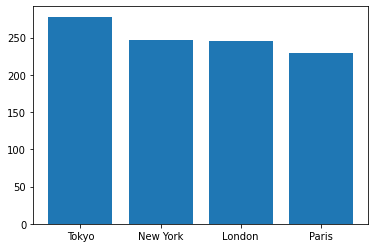

In [61]:
#plot to see which location has the most purchases
plt.bar(count1.index, count1.values)
plt.show()

Tokyo has the most purchases

In [17]:
# converted purchase data to datetime so that it can berecognised by python as date
df["PurchaseDate"]= df["PurchaseDate"].apply(pd.to_datetime)

In [18]:
df.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
dtype: object

In [20]:
# We'll take tokyo and create a data frame from it since it has the  most purchases
df1 = df[df.Location == 'Tokyo']
df1.head()

CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0         8814   2023-04-11             943.31          Product C   890075   
7         6911   2023-04-11             433.33          Product C   963918   
14        9148   2023-04-12              99.15          Product D   629996   
16        2767   2023-04-12             299.57          Product D   342397   
21        8529   2023-04-12             132.99          Product B   562721   

   Location  
0     Tokyo  
7     Tokyo  
14    Tokyo  
16    Tokyo  
21    Tokyo

In [24]:
# get the frrquency of product information
counts=df1['ProductInformation'].value_counts()

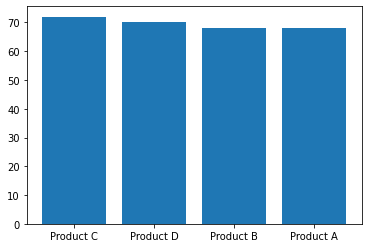

In [25]:
# plot the frequency
plt.bar(counts.index, counts.values)
plt.show()

Product C has the most purchases in tokyo

<AxesSubplot:>

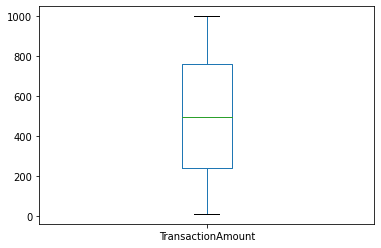

In [27]:
# plotting a box plot to see if there are outliers in transaction amount
df1.boxplot( column =['TransactionAmount'], grid = False) 

There were no outliers

<AxesSubplot:>

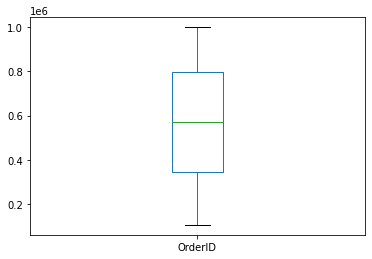

In [65]:
# check to see if there are outliers in the order id column
df1.boxplot( column =['OrderID'], grid = False) 

there are no outliers in the orderid column

In [30]:
# check the latest data for purchase of product
df1['PurchaseDate'].max()

Timestamp('2023-06-10 00:00:00')

In [67]:
now = dt.date(2023,6,10)
now

datetime.date(2023, 6, 10)

In [68]:
#create a new column called date which contains the date of purchase only
df1['date'] = pd.DatetimeIndex(df1['PurchaseDate']).date
df1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17948\3597096328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.DatetimeIndex(df1['PurchaseDate']).date


CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0         8814   2023-04-11             943.31          Product C   890075   
7         6911   2023-04-11             433.33          Product C   963918   
14        9148   2023-04-12              99.15          Product D   629996   
16        2767   2023-04-12             299.57          Product D   342397   
21        8529   2023-04-12             132.99          Product B   562721   

   Location        date  
0     Tokyo  2023-04-11  
7     Tokyo  2023-04-11  
14    Tokyo  2023-04-12  
16    Tokyo  2023-04-12  
21    Tokyo  2023-04-12

### RFM Analysis

### Recency
It is based on the notion that the more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases.

In [73]:
#group by customers by last date of purchase
rec_df = df1.groupby(by='CustomerID', as_index=False)['date'].max()
rec_df.columns = ['CustomerID','LastPurshaceDate']
rec_df.head()

CustomerID LastPurshaceDate
0        1049       2023-05-28
1        1086       2023-06-01
2        1149       2023-04-24
3        1166       2023-05-14
4        1190       2023-05-22

In [74]:
#how often is the customer purchasing with reference to last date
rec_df['Recency'] = rec_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
rec_df.head()

CustomerID LastPurshaceDate  Recency
0        1049       2023-05-28       13
1        1086       2023-06-01        9
2        1149       2023-04-24       47
3        1166       2023-05-14       27
4        1190       2023-05-22       19

### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [75]:
#calculate frequency of purchases for each customer
df1_copy = df1
freq_df = df1_copy.groupby(by=['CustomerID'], as_index=False)['OrderID'].count()
freq_df.columns = ['CustomerID','Frequency']
freq_df.head()

CustomerID  Frequency
0        1049          1
1        1086          1
2        1149          1
3        1166          1
4        1190          1

### Monetary
Monetary attribute describes How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [76]:
#how much a customer has spent with respect to latest date
monet_df = df1.groupby(by='CustomerID',as_index=False).agg({'TransactionAmount': 'sum'})
monet_df.columns = ['CustomerID','Monetary']
monet_df.head()

CustomerID  Monetary
0        1049    225.72
1        1086    100.18
2        1149    510.68
3        1166    948.58
4        1190    935.03

### Create RFM Table
We merged the tables

In [79]:
#merge recency dataframe with frequency dataframe
temp_df = rec_df.merge(freq_df,on='CustomerID')
temp_df.head()

CustomerID LastPurshaceDate  Recency  Frequency
0        1049       2023-05-28       13          1
1        1086       2023-06-01        9          1
2        1149       2023-04-24       47          1
3        1166       2023-05-14       27          1
4        1190       2023-05-22       19          1

In [81]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monet_df,on='CustomerID')
#with CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

LastPurshaceDate  Recency  Frequency  Monetary
CustomerID                                               
1049             2023-05-28       13          1    225.72
1086             2023-06-01        9          1    100.18
1149             2023-04-24       47          1    510.68
1166             2023-05-14       27          1    948.58
1190             2023-05-22       19          1    935.03

### Customer segments with RFM Model

The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall

We devide the customers into quartiles,assigning a score from 1-4

In [51]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

Recency  Frequency  Monetary
0.25     14.0        1.0  239.7500
0.50     31.0        1.0  494.4900
0.75     44.0        1.0  779.7975

### Creation of RFM Segments

In [82]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [83]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segmentation.head()

LastPurshaceDate  Recency  Frequency  Monetary  R_Quartile  \
CustomerID                                                              
1049             2023-05-28       13          1    225.72           1   
1086             2023-06-01        9          1    100.18           1   
1149             2023-04-24       47          1    510.68           4   
1166             2023-05-14       27          1    948.58           2   
1190             2023-05-22       19          1    935.03           2   

            F_Quartile  M_Quartile  
CustomerID                          
1049                 4           4  
1086                 4           4  
1149                 4           2  
1166                 4           1  
1190                 4           1

In [84]:
# Merge the customer r scores to get the RFM score
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

LastPurshaceDate  Recency  Frequency  Monetary  R_Quartile  \
CustomerID                                                              
1049             2023-05-28       13          1    225.72           1   
1086             2023-06-01        9          1    100.18           1   
1149             2023-04-24       47          1    510.68           4   
1166             2023-05-14       27          1    948.58           2   
1190             2023-05-22       19          1    935.03           2   

            F_Quartile  M_Quartile RFMScore  
CustomerID                                   
1049                 4           4      144  
1086                 4           4      144  
1149                 4           2      442  
1166                 4           1      241  
1190                 4           1      241

In [85]:
# arrange in ascending order
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

LastPurshaceDate  Recency  Frequency  Monetary  R_Quartile  \
CustomerID                                                              
9084             2023-04-26       45          1    224.71           4   
7770             2023-04-14       57          1    195.71           4   
3527             2023-04-21       50          1    189.04           4   
8310             2023-04-21       50          1    187.35           4   
8552             2023-04-14       57          1    176.31           4   
3406             2023-04-14       57          1    174.68           4   
1742             2023-04-13       58          1    145.67           4   
2121             2023-04-22       49          1    145.26           4   
9115             2023-04-13       58          1    134.98           4   
8529             2023-04-12       59          1    132.99           4   

            F_Quartile  M_Quartile RFMScore  
CustomerID                                   
9084                 4           4      444  
7770                 4           4      444  
3527                 4           4      444  
8310                 4           4      444  
8552                 4           4      444  
3406                 4           4      444  
1742                 4           4      444  
2121                 4           4      444  
9115                 4           4      444  
8529                 4           4      444

In [86]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='211']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  2
Loyal Customers:  8
Big Spenders:  68
Almost Lost:  2
Lost Customers:  0
Lost Cheap Customers:  20


From combining the individual rfm scores and geting the final rfm score we got 2 best customers, 8 loyal customers, 68 big spenders,2 alost lost customers and 20 who were cheep and lost.
We can give gift vouchers to the best customers,give discounts to the loyal and big spenders. Send emails to the almost lost to see what we cando better to retain them.